In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D,Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from google.colab.patches import cv2_imshow
from base64 import b64decode, b64encode
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import dlib



In [ ]:
!git clone https://github.com/RishitToteja/Headphones_Images_Dataset

Cloning into 'Headphones_Dataset'...
remote: Enumerating objects: 320, done.
remote: Counting objects: 100% (320/320), done.
remote: Compressing objects: 100% (311/311), done.
remote: Total 320 (delta 8), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (320/320), 24.66 MiB | 29.92 MiB/s, done.
Resolving deltas: 100% (8/8), done.


In [ ]:
import os

main_dir = "/content/Headphones_Dataset"

# SETTING TRAIN AND TEST DIRECTORY
train_dir = os.path.join(main_dir, "Train")
test_dir = os.path.join(main_dir, "Test")

#SETING DIRECTORY FOR HEADPHONES AND WITHOUT HEADPHONES IMAGES DIRECTORY
train_head_dir = os.path.join(train_dir, "With_Headphones")
train_normal_dir = os.path.join(train_dir, "Without_Headphones")

test_head_dir = os.path.join(test_dir, "With_Headphones")
test_normal_dir = os.path.join(test_dir, "Without_Headphones")

In [ ]:
train_head_names = os.listdir(train_head_dir)
train_normal_names = os.listdir(train_normal_dir)

test_head_names = os.listdir(test_head_dir)
test_normal_names = os.listdir(test_normal_dir)

['/content/Headphones_Dataset/Train/With_Headphones/f9e7c34b-d35f-4908-8b08-2363ecc01379-BEST_BUY.png', '/content/Headphones_Dataset/Train/With_Headphones/young-man-wearing-headphones-listening-to-music-grey-background-young-man-wearing-headphones-listening-to-music-107840201.jpg', '/content/Headphones_Dataset/Train/With_Headphones/beauty-blogs-girls-in-the-beauty-department-2009-09-18-0918-chanel_iman_headphones_bd.jpg', '/content/Headphones_Dataset/Train/With_Headphones/images (9).jfif', '/content/Headphones_Dataset/Train/With_Headphones/headphones110.png', '/content/Headphones_Dataset/Train/With_Headphones/portrait-of-little-girl-with-headphones-and-microphone-looking-at-CF50B1.jpg', '/content/Headphones_Dataset/Train/With_Headphones/images (4).jfif', '/content/Headphones_Dataset/Train/With_Headphones/Nicki-Minaj-36.png']
['/content/Headphones_Dataset/Train/Without_Headphones/1 (6929).jpg', '/content/Headphones_Dataset/Train/Without_Headphones/1 (6913).jpg', '/content/Headphones_Dat

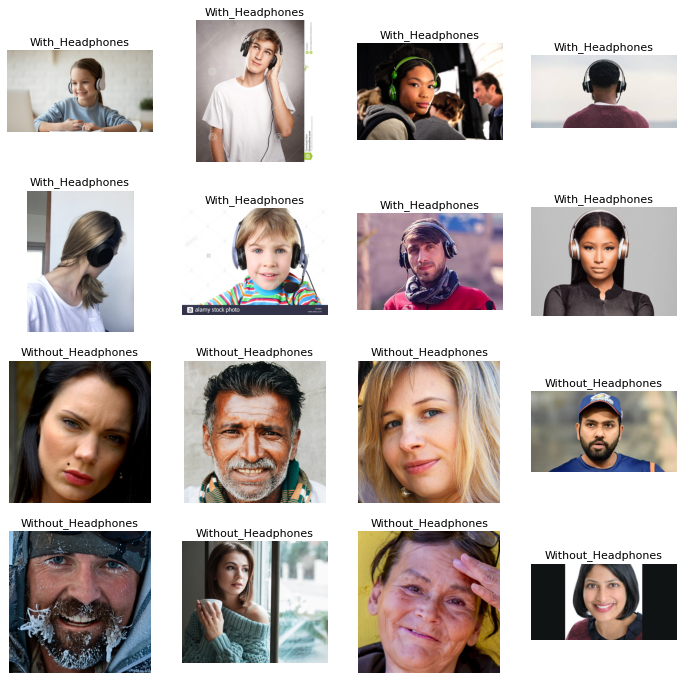

In [ ]:
import matplotlib.image as mpimg

rows = 4
columns = 4

fig = plt.gcf()
fig.set_size_inches(12,12)

head_img = [os.path.join(train_head_dir, filename) for filename in train_head_names[0:8]]
normal_img = [os.path.join(train_normal_dir, filename) for filename in train_normal_names[0:8]]

print(head_img)
print(normal_img)

merged_img = head_img + normal_img

for i, img_path in enumerate(merged_img):
  title = img_path.split("/", 6)[4]
  plot = plt.subplot(rows, columns, i+1)
  plot.axis("Off")
  img = mpimg.imread(img_path)
  plot.set_title(title, fontsize = 11)
  plt.imshow(img, cmap= "gray")

plt.show()

In [ ]:
# CREATING TRAINING, TESTING AND VALIDATION BATCHES

dgen_train = ImageDataGenerator(rescale = 1./255,
                                validation_split = 0.1,
                                zoom_range = 0.2,
                                horizontal_flip = True)

dgen_validation = ImageDataGenerator(rescale = 1./255,
                                     )

dgen_test = ImageDataGenerator(rescale = 1./255,
                              )

train_generator = dgen_train.flow_from_directory(train_dir,
                                                 target_size = (150, 150), 
                                                 subset = 'training',
                                                 batch_size = 32,
                                                 class_mode = 'binary')
validation_generator = dgen_train.flow_from_directory(train_dir,
                                                      target_size = (150, 150), 
                                                      subset = "validation", 
                                                      batch_size = 32, 
                                                      class_mode = "binary")
test_generator = dgen_test.flow_from_directory(test_dir,
                                               target_size = (150, 150), 
                                               batch_size = 32, 
                                               class_mode = "binary")




Found 181 images belonging to 2 classes.
Found 19 images belonging to 2 classes.
Found 31 images belonging to 2 classes.


In [ ]:
print("Class Labels are: ", train_generator.class_indices)
print("Image shape is : ", train_generator.image_shape)

Class Labels are:  {'With_Headphones': 0, 'Without_Headphones': 1}
Image shape is :  (150, 150, 3)


In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D

model = Sequential()

# 1) CONVOLUTIONAL LAYER - 1
model.add(Conv2D(32, (5,5), padding = "same", activation = "relu", input_shape = train_generator.image_shape))

# 2) POOLING LAYER - 1
model.add(MaxPooling2D(pool_size=(2,2)))

# 3) DROPOUT LAYER -2
model.add(Dropout(0.5))

# 4) CONVOLUTIONAL LAYER - 2
model.add(Conv2D(64, (5,5), padding = "same", activation = "relu"))

# 5) POOLING LAYER - 2
model.add(MaxPooling2D(pool_size=(2,2)))

# 6) DROPOUT LAYER - 2
model.add(Dropout(0.5))

# 7) FLATTENING LAYER TO 2D SHAPE
model.add(Flatten())

# 8) ADDING A DENSE LAYER
model.add(Dense(256, activation = 'relu'))

# 9 DROPOUT LAYER - 3
model.add(Dropout(0.5))

# 10) FINAL OUTPUT LAYER
model.add(Dense(1, activation = 'sigmoid'))

### PRINTING MODEL SUMMARY
model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 37, 37, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 87616)             0

In [ ]:
# COMPILING THE MODEL

model.compile(Adam(learning_rate = 0.001), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
# TRAINING THE MODEL
history = model.fit(train_generator, 
                    epochs = 35,
                    validation_data = validation_generator)

Epoch 1/35
6/6 [==============================] - 35s 729ms/step - loss: 1.8280 - accuracy: 0.6298 - val_loss: 0.6886 - val_accuracy: 0.5789
Epoch 2/35
6/6 [==============================] - 4s 642ms/step - loss: 0.6888 - accuracy: 0.4751 - val_loss: 0.6922 - val_accuracy: 0.5789
Epoch 3/35
6/6 [==============================] - 4s 628ms/step - loss: 0.6818 - accuracy: 0.5359 - val_loss: 0.6910 - val_accuracy: 0.5789
Epoch 4/35
6/6 [==============================] - 4s 677ms/step - loss: 0.6678 - accuracy: 0.6077 - val_loss: 0.6900 - val_accuracy: 0.5789
Epoch 5/35
6/6 [==============================] - 4s 605ms/step - loss: 0.6729 - accuracy: 0.5525 - val_loss: 0.6882 - val_accuracy: 0.5789
Epoch 6/35
6/6 [==============================] - 4s 619ms/step - loss: 0.6480 - accuracy: 0.6906 - val_loss: 0.6273 - val_accuracy: 0.6316
Epoch 7/35
6/6 [==============================] - 4s 664ms/step - loss: 0.5913 - accuracy: 0.7017 - val_loss: 0.5216 - val_accuracy: 0.8421
Epoch 8/35
6/6 [===

Text(0.5, 0, 'epoch')

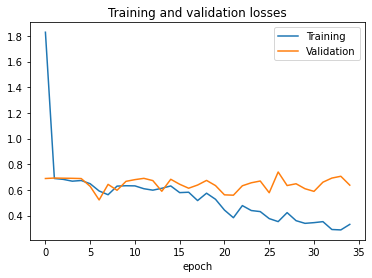

In [ ]:
# PLOT GRAPH BETWEEN TRAINING AND VALIDATION LOSS
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title("Training and validation losses")
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

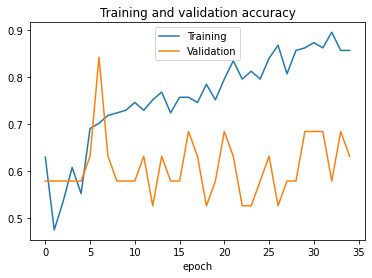

In [ ]:
# PLOT GRAPH BETWEEN TRAINING AND VALIDATION ACCURACY
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title("Training and validation accuracy")
plt.xlabel('epoch')

In [ ]:
# GETTING TEST ACCURACY AND LOSS

test_loss, test_acc = model.evaluate(test_generator)
print("Test Set Loss : ", test_loss)
print("Test Set Accuracy : ", test_acc)

1/1 [==============================] - 1s 838ms/step - loss: 0.4530 - accuracy: 0.8387
Test Set Loss :  0.45299068093299866
Test Set Accuracy :  0.8387096524238586


In [ ]:
model.save("Pretrained_model.h5")